# Part 1: EDA

In [5]:
# Run the common codes to import modules, get data and pre-defined loss functions
%run Part0.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               1061 non-null   object  
 1   selling_price      1061 non-null   int64   
 2   year               1061 non-null   int64   
 3   seller_type        1061 non-null   category
 4   owner              1061 non-null   int32   
 5   km_driven          1061 non-null   int64   
 6   ex_showroom_price  626 non-null    float64 
dtypes: category(1), float64(1), int32(1), int64(3), object(1)
memory usage: 46.9+ KB
None
                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  I

In [6]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1,350,NaN
1,Honda Dio,45000,2017,Individual,1,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2,21000,NaN


## Task 1: Numeric summaries of the selling_price variable

In [9]:
# numeric summaries of selling_price by seller_type
df.groupby("seller_type")["selling_price"].describe()

,count,mean,std,min,25%,50%,75%,max
seller_type,,,,,,,,
Dealer,6.0,46666.666667,25734.542286,15000.0,28250.0,44000.0,66500.0,80000.0
Individual,1055.0,59711.923223,56427.961672,5000.0,28000.0,45000.0,70000.0,760000.0


In [86]:
# numeric summaries of selling_price by number of owners
df.groupby("owner")["selling_price"].describe()

,count,mean,std,min,25%,50%,75%,max
owner,,,,,,,,
1,924.0,60022.813853,51542.569711,5000.0,30000.0,45000.0,74250.0,760000.0
2,123.0,55666.658537,81671.923395,6000.0,25000.0,32000.0,57500.0,750000.0
3,11.0,55727.272727,38385.129697,20000.0,27500.0,45000.0,67500.0,150000.0
4,3.0,118333.333333,183325.757419,10000.0,12500.0,15000.0,172500.0,330000.0


## Task 2: Plots of the selling_price variable

Text(0.5, 1.0, 'Selling Pirce by Driven Distance')

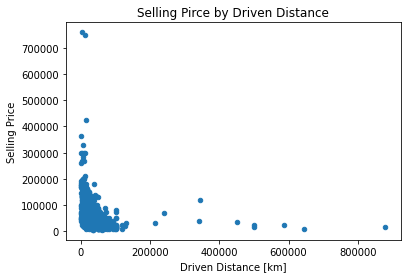

In [100]:
# graphic summery - scatter plot of selling price by driven distance
df.plot.scatter(x="km_driven", y="selling_price")
plt.xlabel("Driven Distance [km]")
plt.ylabel("Selling Price")
plt.title("Selling Pirce by Driven Distance")

plt.show()

Text(0.5, 1.0, 'Sold by Individual')

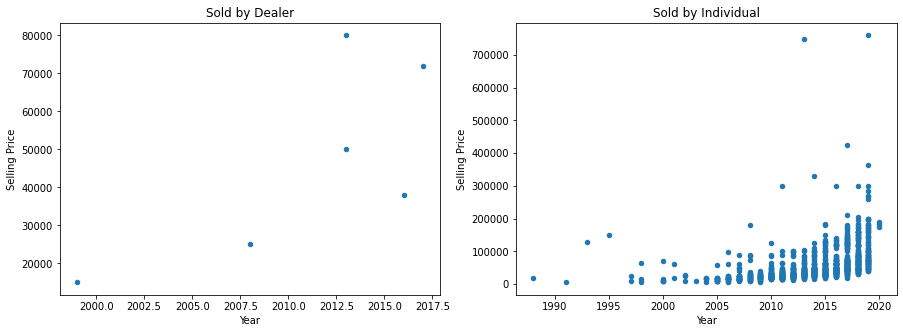

In [102]:
# graphic summery - scatter plot of selling price by seller type
df_dealer = df[df["seller_type"] == "Dealer"]
df_individual = df[df["seller_type"] == "Individual"]

# create 1x2 plots
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 5))

# first scatter plot
plt.subplot(1, 2, 1) 
df_dealer.plot.scatter(ax=ax[0], x="year", y="selling_price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Sold by Dealer")

# second scatter plot
plt.subplot(1, 2, 2) 
df_individual.plot.scatter(ax=ax[1], x="year", y="selling_price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Sold by Individual")

plt.show()

## Task 3: Two-way contingency table

In [91]:
# Contingency table: owner by selling prices (ranges)
df["price_range"] = pd.cut(df.selling_price, bins=[0, 10000, 100000, 1000000])
pd.crosstab(df.owner, df.price_range, margins = True) 

price_range,"(0, 10000]","(10000, 100000]","(100000, 1000000]",All
owner,,,,
1,19,775,130,924
2,4,105,14,123
3,0,10,1,11
4,1,1,1,3
All,24,891,146,1061


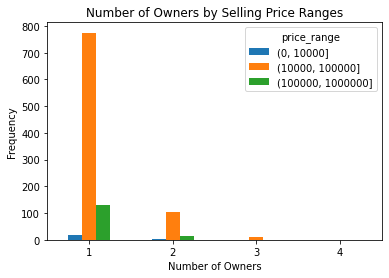

In [103]:
# stacked bar plot: owner by selling prices (ranges)
pd.crosstab(df.owner, df.price_range).plot.bar()
plt.xlabel("Number of Owners")
plt.ylabel("Frequency")
plt.title("Number of Owners by Selling Price Ranges")
plt.xticks(rotation = 0)

plt.show()

In [93]:
# Contingency table: driven distances (ranges) by selling prices (ranges)
df["dist_range"] = pd.cut(df.km_driven, bins=[0, 10000, 100000, 1000000])
pd.crosstab(df.dist_range, df.price_range, margins = True) 

price_range,"(0, 10000]","(10000, 100000]","(100000, 1000000]",All
dist_range,,,,
"(0, 10000]",0,131,79,210
"(10000, 100000]",22,748,66,836
"(100000, 1000000]",2,12,1,15
All,24,891,146,1061


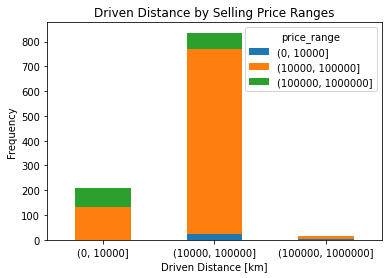

In [104]:
# side-by-side bar plot: driven distances (ranges) by selling prices (ranges)
pd.crosstab(df.dist_range, df.price_range).plot.bar(stacked = True)
plt.xlabel("Driven Distance [km]")
plt.ylabel("Frequency")
plt.title("Driven Distance by Selling Price Ranges")
plt.xticks(rotation = 0)

plt.show()